# Bank Marketing Classification

In this part of the assignment we want to do a classification task using PyTorch on bank marketing dataset.

#Import Library

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

#Load Dataset
Here, you should download and load the dataset. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [15]:
#TODO
dataset = pd.read_csv("bank-full.csv" , delimiter=';', quotechar='"')

dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#Normalize data
normalize numerical data.

In [17]:
# Normalize numerical data
label_encoders = {}
categorical_columns = dataset.select_dtypes(include="object").columns

for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

print("label encoding finished")

X = dataset.drop('y', axis=1).values
y = dataset['y'].values

print("features and target separated.")

scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Data normalized")

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)

print("trianing, validation and test data created.")

label encoding finished
features and target separated.
Data normalized
trianing, validation and test data created.


# Create Data Loader
create data loader for pytorch

In [20]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [21]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [22]:
#TODO
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


#Model
define your model in here

In [24]:
class BankMarketingNet(nn.Module):
    def __init__(self, input_dim):
        super(BankMarketingNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      x = self.relu(self.fc1(x))
      x = self.relu(self.fc2(x))
      x = self.sigmoid(self.fc3(x))
      return x

#Train your model
Define `criterion` and `optimizer`.
Train your model

Tasks:
- [ ] Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Validation loss
- [ ] save train/validation loss (of each epoch) in an array for later usage

In [25]:
#TODO
input_dim = X_train_tensor.shape[1]
model = BankMarketingNet(input_dim=input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            val_loss += loss.item()
    
    train_losses.append(train_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))

    print(f'Epoch {epoch+1}/{num_epochs}; Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')




Epoch 1/20; Train Loss: 0.2851, Val Loss: 0.2465
Epoch 2/20; Train Loss: 0.2371, Val Loss: 0.2404
Epoch 3/20; Train Loss: 0.2323, Val Loss: 0.2427
Epoch 4/20; Train Loss: 0.2289, Val Loss: 0.2366
Epoch 5/20; Train Loss: 0.2276, Val Loss: 0.2365
Epoch 6/20; Train Loss: 0.2255, Val Loss: 0.2347
Epoch 7/20; Train Loss: 0.2240, Val Loss: 0.2351
Epoch 8/20; Train Loss: 0.2224, Val Loss: 0.2336
Epoch 9/20; Train Loss: 0.2209, Val Loss: 0.2324
Epoch 10/20; Train Loss: 0.2189, Val Loss: 0.2332
Epoch 11/20; Train Loss: 0.2180, Val Loss: 0.2305
Epoch 12/20; Train Loss: 0.2164, Val Loss: 0.2335
Epoch 13/20; Train Loss: 0.2155, Val Loss: 0.2326
Epoch 14/20; Train Loss: 0.2144, Val Loss: 0.2307
Epoch 15/20; Train Loss: 0.2132, Val Loss: 0.2334
Epoch 16/20; Train Loss: 0.2118, Val Loss: 0.2349
Epoch 17/20; Train Loss: 0.2110, Val Loss: 0.2306
Epoch 18/20; Train Loss: 0.2097, Val Loss: 0.2305
Epoch 19/20; Train Loss: 0.2091, Val Loss: 0.2291
Epoch 20/20; Train Loss: 0.2078, Val Loss: 0.2309


### Visualize Loss plot

Using the arrays that you have (from previous task in the above section), visualize Loss plot (train and validation together)

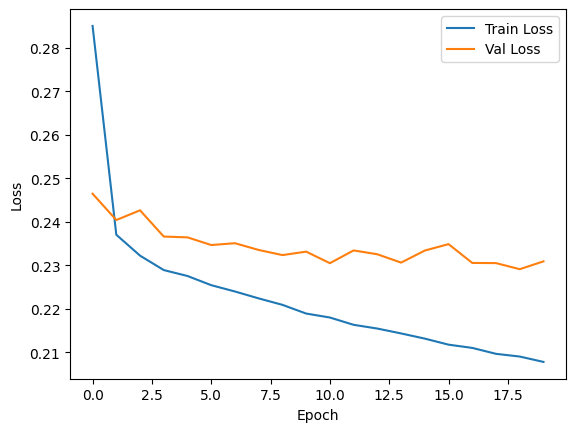

In [26]:
#TODO
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluation

Test your trained model (using the Test Dataloader that you have).

In [30]:
#TODO

test_loss = 0.0
correct = 0
total = 0

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        test_loss += loss.item()

        predicted = torch.round(outputs).squeeze()

        correct += (predicted == labels).sum().item()
        
        total += labels.size(0)


avg_test_loss = test_loss / len(test_loader)

accuracy = correct / total

print(f'Avg Test Loss: {avg_test_loss:.4f}\nAccuracy: {accuracy*100:.4f}')


Avg Test Loss: 0.2290
Accuracy: 90.3716
